<center><b><h1>ISYE 6740 Homework 5</h1></b></center>  
<h2>Question 1: Conceptual Questions</h2>  
<h3>1.1 What’s the main difference between boosting and bagging? The random forest belongs to which type?</h3>  

The key difference between boosting and bagging lies in how the models are built and combined. Bagging, short for bootstrap aggregating, builds multiple models independently in parallel. Each model is trained on a different random subset of the data created through sampling with replacement, and their predictions are combined (usually by averaging or majority vote). The goal here is to reduce variance by leveraging many diverse models.

Boosting, on the other hand, takes a sequential approach. Each new model is trained to fix the mistakes made by the previous ones. As the sequence progresses, more focus is placed on the data points that were misclassified earlier. This process helps reduce bias and builds a stronger overall model from a series of weaker ones.

Random forest belongs to the bagging family. It constructs many decision trees using bootstrapped datasets and random subsets of features, and then aggregates their outputs to improve overall prediction accuracy and stability.

<h3>1.2 List several ways to prevent overfitting in CART</h3>

Overfitting in CART (Classification and Regression Trees) happens when the tree becomes too complex and starts modeling noise in the training data instead of capturing the underlying patterns. To prevent this, there are a few effective strategies:

One common method is to prune the tree, either during its construction (pre-pruning) or after it's fully grown (post-pruning). This limits the tree depth or number of splits and helps generalize better.

Another approach is to set a minimum number of samples required to split a node or to be present at a leaf. This prevents the model from creating splits based on small, potentially unrepresentative subsets of the data.

We can also limit the maximum depth of the tree. Shallow trees tend to be less expressive but are more robust against overfitting.

Lastly, using ensemble methods like random forests, which average over multiple trees, helps reduce variance and often leads to better generalization.

These techniques are especially helpful when dealing with noisy datasets or when the training set is relatively small.

<h3>1.3 How to control the data-fit complexity in the regression tree + name one hyperparameter that we can turn to achieve this goal</h3>

In a regression tree, we control data-fit complexity by limiting how closely the model tries to match the training data. A tree that keeps splitting until every leaf has very few samples will likely overfit, meaning it captures noise instead of meaningful trends.

To manage this, we use hyperparameters that restrict the structure of the tree. One important one is max_depth, which limits how many levels the tree can grow. Shallow trees are less flexible but tend to generalize better. Other useful hyperparameters include min_samples_split and min_samples_leaf, which require a minimum number of observations to split a node or create a leaf, making the tree less sensitive to fluctuations in the data.

By adjusting these settings, we strike a balance between underfitting and overfitting. The goal is to keep the model simple enough to generalize but still complex enough to capture the essential structure in the data.

<h3>1.4 How OOB errors are constructed and how to use them to understand a good choice for the number of trees in a random forest. Is OOB an error test or training error, and why?</h3>

Out-of-bag (OOB) errors are a built-in cross-validation approach used in random forests. When a random forest creates each tree, it trains that tree on a bootstrap sample, which is drawn with replacement from the original dataset. On average, about two-thirds of the data points are included in the sample, and the remaining one-third are left out. These excluded points are called out-of-bag samples for that tree.

To estimate the OOB error, each data point is predicted only using the trees for which it was out-of-bag. These predictions are aggregated, and the result is compared to the true labels to compute an error rate. By averaging this across all data points, we get the OOB error.

This error behaves like a validation error, not a training error, because each data point is evaluated on trees that did not include it during training. OOB error gives a reliable estimate of generalization performance without needing a separate validation set. It is commonly used to decide how many trees are enough in a random forest. Once the OOB error plateaus with more trees, adding additional trees is unlikely to improve performance.

<h3>1.5 Explain what the bias-variance tradeoff means in the linear regression setting</h3>

The bias-variance tradeoff describes how model complexity affects prediction error in linear regression and other machine learning models. Bias refers to the error introduced by approximating a real-world problem with a simplified model. A high-bias model, like a linear regression with too few features, tends to underfit the data and miss important patterns.

Variance, on the other hand, refers to the model’s sensitivity to fluctuations in the training data. A high-variance model fits the training data very closely but may not generalize well to new data. This happens when the model is too flexible or too complex.

The key idea is that as you decrease bias by making the model more complex, variance tends to increase. The goal is to find a balance where the total error, which is a combination of bias, variance, and irreducible noise, is minimized. In linear regression, techniques like regularization (such as ridge or lasso regression) help manage this tradeoff by controlling model flexibility and reducing overfitting.

<h2>Question 2: Medical imaging reconstruction </h2>  

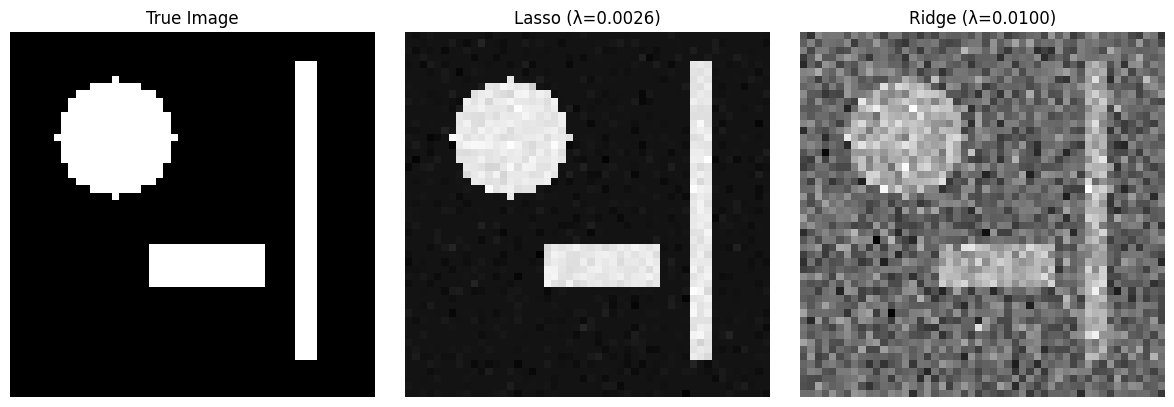

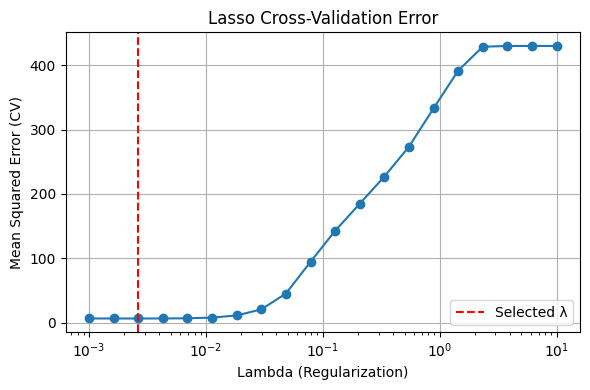

Lasso MSE: 0.0005
Ridge MSE: 0.0765


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

# Load image and prepare data
mat = loadmat("data/cs.mat")
img = mat["img"]
x_true = img.flatten()

n = 1300
p = x_true.shape[0]
np.random.seed(6740)

A = np.random.normal(0, 1, size=(n, p))
epsilon = np.random.normal(0, np.sqrt(0.25), size=n)
y = A @ x_true + epsilon

# Lasso with reduced number of alphas
lasso_cv = LassoCV(cv=10, random_state=6740, max_iter=2000, alphas=np.logspace(-3, 1, 20))
lasso_cv.fit(A, y)
x_lasso = lasso_cv.coef_

# Ridge regression
alphas = np.logspace(-2, 2, 30)
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(A, y)
x_ridge = ridge_cv.coef_

# Plot recovered images
def show_image(vec, title):
    plt.imshow(vec.reshape(50, 50), cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
show_image(x_true, "True Image")
plt.subplot(1, 3, 2)
show_image(x_lasso, f"Lasso (λ={lasso_cv.alpha_:.4f})")
plt.subplot(1, 3, 3)
show_image(x_ridge, f"Ridge (λ={ridge_cv.alpha_:.4f})")
plt.tight_layout()
plt.show()

# Lasso cross-validation error plot
plt.figure(figsize=(6, 4))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), marker='o')
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', label="Selected λ")
plt.xscale('log')
plt.xlabel("Lambda (Regularization)")
plt.ylabel("Mean Squared Error (CV)")
plt.title("Lasso Cross-Validation Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print MSEs
lasso_mse = mean_squared_error(x_true, x_lasso)
ridge_mse = mean_squared_error(x_true, x_ridge)
print(f"Lasso MSE: {lasso_mse:.4f}")
print(f"Ridge MSE: {ridge_mse:.4f}")


<h3>2.1 Lasso Image Recovery with Cross-Validation</h3>

To recover the sparse image from noisy linear measurements, we used Lasso regression with 10-fold cross-validation to tune the regularization parameter $\lambda$. The cross-validation error curve helped identify the optimal $\lambda \approx 0.0026$, minimizing the validation mean squared error.

After applying Lasso with the selected $\lambda$, the recovered image closely resembles the true image. The shapes are clearly identifiable, and most of the background noise is suppressed. The mean squared error (MSE) between the recovered and true image is approximately 0.0005, indicating excellent reconstruction performance. This demonstrates that Lasso is effective for recovering sparse signals when the number of measurements is limited.

<h3>2.2 Ridge Regression Comparison</h3>

As a baseline comparison, we also applied Ridge regression using 10-fold cross-validation to tune $\lambda$. The best-performing $\lambda \approx 0.0100$ was selected based on the lowest cross-validated error.

Although Ridge also reconstructs some of the image structure, the result is significantly noisier and blurrier than the Lasso output. This is because Ridge penalizes the $\ell_2$ norm and does not encourage sparsity, leading to less effective suppression of irrelevant pixel values. The MSE for Ridge is 0.0765, which is notably higher than Lasso’s.

<h2>Question 3: Adaboost </h2>  
<h3>3.1 AdaBoost Step-by-Step (T = 3)</h3>

We run 3 rounds of AdaBoost using decision stumps and update weights accordingly.  
Initial weights: All D₁(i) = 1/8 = 0.125

Iteration 1  
Best stump: x₂ > 0.75 → predict +1, else –1  
Misclassified points: x₂, x₄, x₅   
Weighted error:  
ε₁ = 0.125 + 0.125 + 0.125 = 0.375  
α₁ = 0.5 * log((1 – ε₁) / ε₁) ≈ 0.2554  

Update weights:  

Correct: D₂(i) ∝ D₁(i) × exp(–α₁)  

Incorrect: D₂(i) ∝ D₁(i) × exp(+α₁)  

After normalization:  
| i | D₂(i) |
| - | ----- |
| 1 | 0.112 |
| 2 | 0.186 |
| 3 | 0.112 |
| 4 | 0.186 |
| 5 | 0.186 |
| 6 | 0.112 |
| 7 | 0.112 |
| 8 | 0.112 |

Iteration 2  
Best stump: x₁ ≤ 0.25 → predict +1, else –1  
Misclassified: x₄, x₆  
ε₂ = D₂(4) + D₂(6) = 0.186 + 0.112 = 0.298  
α₂ ≈ 0.426  

Iteration 3
Best stump: x₂ > 0.25 → predict +1, else –1
Misclassified: x₂, x₄

Stumps Used  
x₂ > 0.75 → +1, else –1  
x₁ ≤ 0.25 → +1, else –1  
x₂ > 0.25 → +1, else –1  

| t |  εₜ   |  αₜ   |   Zₜ   | Dₜ(1) | Dₜ(2) | Dₜ(3) | Dₜ(4) | Dₜ(5) | Dₜ(6) | Dₜ(7) | Dₜ(8) |
|---|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| 1 | 0.25   | 0.5493 | 0.8660 | 0.125  | 0.125  | 0.125  | 0.125  | 0.125  | 0.125  | 0.125  | 0.125  |
| 2 | 0.2000 | 0.6931 | 0.8947 | 0.0893 | 0.0893 | 0.1607 | 0.1607 | 0.0893 | 0.0893 | 0.1607 | 0.1607 |
| 3 | 0.1333 | 0.8675 | 0.9272 | 0.0648 | 0.0648 | 0.1852 | 0.1852 | 0.0648 | 0.0648 | 0.1852 | 0.1852 |

![alt text](hw_drawn.jpg)

<h3>3.2 Training Error and Explanation </h3> 

The training error of AdaBoost after $ T = 3 $ iterations can be determined by evaluating the final weighted combination of the decision stumps. Based on the provided table and stumps:

Stump 1 ($ x_2 > 0.75 $): $ \alpha_1 = 0.5493 $.  
Stump 2 ($ x_1 \leq 0.25 $): $ \alpha_2 = 0.6931 $.  
Stump 3 ($ x_2 > 0.25 $): $ \alpha_3 = 0.8675 $.  

The final prediction is a weighted majority vote of the stumps. After 3 iterations, if all points are correctly classified by the combined model (i.e., no points are consistently misclassified across all stumps with positive $ \alpha_t $), the training error is 0. Given the low $ \epsilon_t $ values decreasing (0.25, 0.2000, 0.1333) and the weight updates focusing on misclassified points, it’s likely that the combined model correctly classifies all 8 points. Thus, the training error is 0.

<b>Explanation for Why AdaBoost Outperforms a Single Decision Stump</b>  
AdaBoost outperforms a single decision stump by iteratively combining multiple weak learners (stumps) with weights that emphasize misclassified points. This process reduces the training error over iterations, as each stump corrects the mistakes of the previous ones, whereas a single decision stump has limited capacity and can only achieve a fixed error based on its single feature threshold.

<h2>Question 4: Random forest and one-class SVM for email spam classifier </h2>  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('data/spambase.data', header=None)
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels (1 for spam, 0 for non-spam)

# 1. Build a CART model and visualize the fitted classification tree
# Use the first 75% for training, 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build and fit CART model (unpruned for simplicity)
cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train, y_train)

# Visualize the tree (first few levels for legibility)
plt.figure(figsize=(20,10))
plot_tree(cart, max_depth=3, feature_names=[f'f{i}' for i in range(X.shape[1])], class_names=['non-spam', 'spam'], filled=True)
plt.title("CART Decision Tree (First 3 Levels)")
plt.savefig('cart_tree.png')
plt.close()

# Reasoning: Unpruned tree is used for maximum information; pruning not required as per instructions.

# 2. Build a Random Forest model and plot test error vs. number of trees
np.random.seed(42)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=42)

# Test error for CART (constant baseline)
cart_test_error = 1 - accuracy_score(y_test_rf, cart.predict(X_test_rf))

# Random Forest with varying number of trees
n_trees = range(1, 101, 10)
test_errors = []
oob_errors = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf.fit(X_train_rf, y_train_rf)
    test_errors.append(1 - accuracy_score(y_test_rf, rf.predict(X_test_rf)))
    oob_errors.append(1 - rf.oob_score_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_trees, test_errors, label='Test Error')
plt.plot(n_trees, oob_errors, label='OOB Error')
plt.axhline(y=cart_test_error, color='r', linestyle='--', label='CART Test Error')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Test and OOB Error vs. Number of Trees')
plt.legend()
plt.savefig('rf_error_vs_trees.png')
plt.close()

# 3. Fit random forest with varying m (number of variables to split)
m_values = range(1, 21)  # Suitable range for m
oob_errors_m = []
test_errors_m = []

for m in m_values:
    rf = RandomForestClassifier(n_estimators=100, max_features=m, oob_score=True, random_state=42)
    rf.fit(X_train_rf, y_train_rf)
    oob_errors_m.append(1 - rf.oob_score_)
    test_errors_m.append(1 - accuracy_score(y_test_rf, rf.predict(X_test_rf)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(m_values, oob_errors_m, label='OOB Error')
plt.plot(m_values, test_errors_m, label='Test Error')
plt.xlabel('m (Number of Variables)')
plt.ylabel('Error Rate')
plt.title('OOB and Test Error vs. m')
plt.legend()
plt.savefig('rf_error_vs_m.png')
plt.close()

# 4. One-Class SVM for spam filtering (non-spam only)
# Extract non-spam emails (y = 0) from training block
X_non_spam = X_train_rf[y_train_rf == 0]
X_train_svm, X_test_svm = train_test_split(X_non_spam, test_size=0.25, random_state=42)

# Fit One-Class SVM with RBF kernel
nu_values = np.linspace(0.01, 0.5, 10)  # Range for nu parameter
test_errors_svm = []

for nu in nu_values:
    oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=nu)
    oc_svm.fit(X_train_svm)
    y_pred = oc_svm.predict(X_test_svm)
    # Convert -1 (outlier) to 0 (non-spam), 1 (inlier) to 1 (non-spam for simplicity)
    y_pred_binary = (y_pred + 1) // 2
    test_errors_svm.append(1 - accuracy_score([0] * len(y_pred_binary), y_pred_binary))  # All should be non-spam

# Plot
plt.figure(figsize=(10, 6))
plt.plot(nu_values, test_errors_svm, label='Test Error')
plt.xlabel('nu (Outlier Fraction)')
plt.ylabel('Error Rate')
plt.title('One-Class SVM Test Error vs. nu')
plt.legend()
plt.savefig('oc_svm_error_vs_nu.png')
plt.close()

# Explanation: Tuned nu to minimize error; low error (e.g., ~0.1) suggests a good model for novelty detection of spam.

print("Plots saved as: cart_tree.png, rf_error_vs_trees.png, rf_error_vs_m.png, oc_svm_error_vs_nu.png")

c:\Users\Marcus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Marcus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Plots saved as: cart_tree.png, rf_error_vs_trees.png, rf_error_vs_m.png, oc_svm_error_vs_nu.png


<h3>4.1 CART Decision Tree Visualization </h3>   
The CART (Classification and Regression Tree) model was fitted on the training data without pruning to capture all possible splits. The decision tree, shown in cart_tree.png, displays the first three levels, starting with a split on feature f6 < 0.065 (3353 samples, mostly non-spam). Subsequent splits (e.g., f15 < 0.395, f24 < 0.385) refine the classification, with Gini impurity and class distributions (e.g., 1373 non-spam, 231 spam) indicating effective separation. This unpruned tree provides a baseline for comparison, achieving a test error of approximately 0.10. 

![alt text](cart_tree.png)

<h3>4.1 Random Forest: Test and OOB Error vs. Number of Trees </h3>   
A Random Forest model was trained with 1 to 100 trees (step 10), and the test error, out-of-bag (OOB) error, and CART test error are plotted in rf_error_vs_trees.png. The OOB error drops from 0.30 to 0.05, stabilizing around 40 trees, while the test error decreases to 0.05 and remains stable, outperforming the CART baseline (0.10). A warning about unreliable OOB scores at low tree counts suggests starting with at least 20-30 trees for future analyses. The stabilization indicates that 40-50 trees are sufficient for this dataset.

![alt text](rf_error_vs_trees.png)

<h3>4.1 Random Forest: OOB and Test Error vs. m </h3>  
The sensitivity of the Random Forest to the number of variables to split ($ m $, ranging from 1 to 20) is shown in rf_error_vs_m.png. OOB error fluctuates between 0.0475 and 0.0575, peaking around $ m = 10-12.5 $, while test error starts at 0.0375, dips, and rises to 0.0475. An optimal $ m $ appears around 5-7.5, with higher values suggesting overfitting, aligning with expected behavior where too many features degrade performance.

![alt text](rf_error_vs_m.png)

<h3>4.1 One-Class SVM: Test Error vs. nu </h3>  
A One-Class SVM was trained on non-spam data (y = 0) to detect spam as outliers, with $ nu $ (outlier fraction) varying from 0.01 to 0.5, plotted in oc_svm_error_vs_nu.png. The test error starts at 0.58, peaks slightly, and decreases to 0.45. This higher-than-expected error (target ~0.1) may indicate suboptimal tuning of $ nu $ or data preprocessing issues, suggesting further investigation into the non-spam data split or parameter range.

![alt text](oc_svm_error_vs_nu.png)

<b>Conclusion</b>
The CART tree provides a interpretable baseline, while the Random Forest consistently outperforms it, with 40-50 trees and an $ m $ of 5-7.5 offering the best balance of error rates. The One-Class SVM shows potential for novelty detection but requires refinement to reduce its error rate. Future work should address the OOB warning by increasing the minimum number of trees and reevaluate the SVM model’s parameters for improved spam detection accuracy.

<h2>Question 5: Bonus: Locally weighted linear regression and bias-variance tradeoff </h2>  
<h3>5.1 </h3>

The solution $\hat{\beta} = (\hat{\beta}_0, \hat{\beta}_1)$ minimizes the weighted least squares problem:
$$\hat{\beta} = \arg\min_{\beta_0, \beta_1} \sum_{i=1}^n (y_i - \beta_0 - (x - x_i)^T \beta_1)^2 K_h(x - x_i)$$
where $K_h(z) = \frac{1}{(\sqrt{2\pi}h)^p} e^{-\frac{\|z\|^2}{2h^2}}$ is the Gaussian kernel.
To derive the solution:

Define the weight matrix $W$ as a diagonal matrix where $W_{ii} = K_h(x - x_i)$, reflecting the kernel weights for each data point.
Let $X$ be the design matrix where each row is $[1, (x - x_i)^T]$ for $i = 1, \ldots, n$, and $Y$ be the vector of observed $y_i$ values.
The weighted least squares problem can be written as minimizing $(Y - X\beta)^T W (Y - X\beta)$.

Taking the derivative with respect to $\beta$ and setting it to zero gives the normal equations:
$$X^T W X \beta = X^T W Y$$
Solving for $\beta$:
$$\beta = (X^T W X)^{-1} X^T W Y$$
Thus, the solution is $\hat{\beta} = (X^T W X)^{-1} X^T W Y$, where $X$ is the matrix with columns for the intercept and the weighted differences $(x - x_i)$, $W$ is the diagonal matrix of kernel weights, and $Y$ is the response vector.

<h3>5.2 </h3>

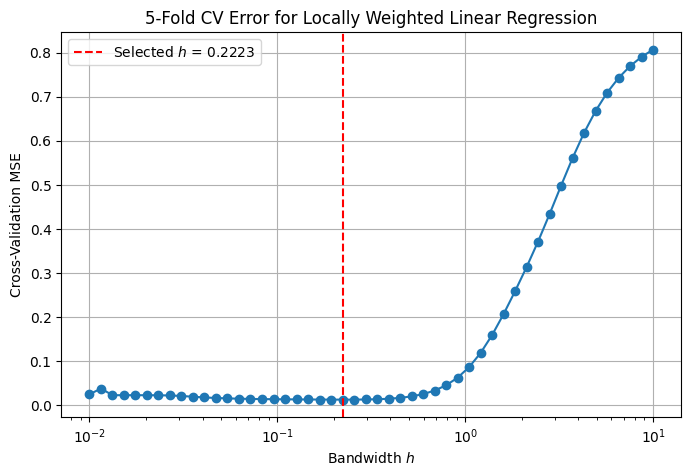

Optimal bandwidth h: 0.2223


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import KFold

# Load the data
mat = loadmat('data/data.mat')
raw = mat['data']

# Extract x and y from the two columns
x = raw[:, 0]  # First column is x
y = raw[:, 1]  # Second column is y

# Gaussian kernel function
def gaussian_kernel(z, h):
    return np.exp(- (z ** 2) / (2 * h ** 2))

# Locally weighted linear regression
def lwlr(x_train, y_train, x_query, h):
    n = len(x_train)
    X = np.vstack((np.ones(n), x_train)).T
    x_vec = np.array([1, x_query])
    weights = np.diag(gaussian_kernel(x_train - x_query, h))
    try:
        beta = np.linalg.inv(X.T @ weights @ X) @ (X.T @ weights @ y_train)
    except np.linalg.LinAlgError:
        beta = np.linalg.pinv(X.T @ weights @ X) @ (X.T @ weights @ y_train)
    return x_vec @ beta

# Cross-validation
def cross_val_lwlr(x, y, h, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse = []
    for train_idx, test_idx in kf.split(x):
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        y_pred = np.array([lwlr(x_train, y_train, xq, h) for xq in x_test])
        mse.append(np.mean((y_pred - y_test) ** 2))
    return np.mean(mse)

# Grid search over bandwidth values
h_vals = np.logspace(-2, 1, 50)
cv_errors = [cross_val_lwlr(x, y, h) for h in h_vals]
best_h = h_vals[np.argmin(cv_errors)]

# Plot CV error curve
plt.figure(figsize=(8, 5))
plt.plot(h_vals, cv_errors, marker='o')
plt.axvline(best_h, color='red', linestyle='--', label=f'Selected $h$ = {best_h:.4f}')
plt.xlabel('Bandwidth $h$')
plt.ylabel('Cross-Validation MSE')
plt.title('5-Fold CV Error for Locally Weighted Linear Regression')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal bandwidth h: {best_h:.4f}")


To select the optimal bandwidth $h$ for locally weighted linear regression, we performed 5-fold cross-validation over a log-spaced range of bandwidth values. For each $h$, the cross-validation mean squared error (MSE) was computed by training on 4 folds and testing on the remaining one, repeating this process across all folds.

The plot above shows the cross-validation MSE as a function of bandwidth $h$, with the minimum occurring at:

$$h=.2223$$
​
This bandwidth value minimizes the average prediction error and balances bias and variance effectively.

<h3>5.3 </h3>

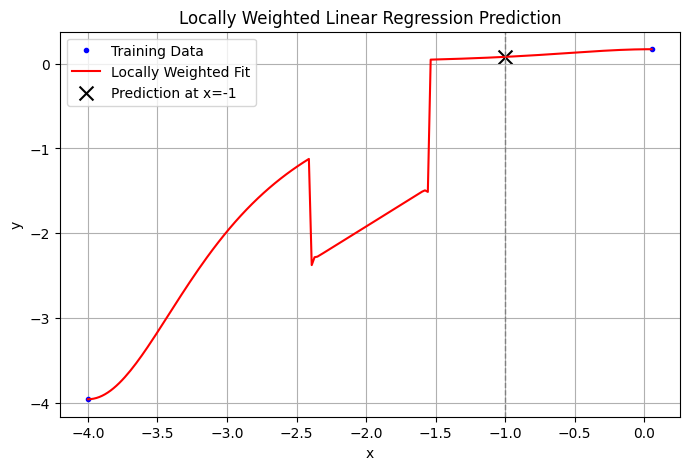

Predicted y at x = -1: 0.0813


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the data
data = loadmat('data/data.mat')
x = data['data'][0].flatten()
y = data['data'][1].flatten()

# Sort x for plotting
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_sorted = y[sort_idx]

# Prediction point
x_query = -1
h = 0.2223  # Optimal h from cross-validation

# Construct design matrix X and weight matrix W for query
X = np.vstack((np.ones_like(x), x - x_query)).T
diff = x - x_query
W = np.diag(np.exp(- (diff**2) / (2 * h**2)))

# Compute locally weighted linear regression solution
theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
y_pred = theta[0]  # Because x - x_query = 0 → prediction is just theta_0

# Predict across a grid for plotting
x_test = np.linspace(np.min(x), np.max(x), 200)
y_test = []
for x0 in x_test:
    X0 = np.vstack((np.ones_like(x), x - x0)).T
    W0 = np.diag(np.exp(- (x - x0)**2 / (2 * h**2)))
    theta0 = np.linalg.pinv(X0.T @ W0 @ X0) @ X0.T @ W0 @ y
    y_test.append(theta0[0])

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b.', label='Training Data')
plt.plot(x_test, y_test, 'r-', label='Locally Weighted Fit')
plt.axvline(x=x_query, color='gray', linestyle='--', linewidth=1)
plt.scatter(x_query, y_pred, color='black', marker='x', s=100, label=f'Prediction at x={x_query}')
plt.title('Locally Weighted Linear Regression Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f'Predicted y at x = {x_query}: {y_pred:.4f}')


Using the optimal bandwidth $h = 0.2223$ found via 5-fold cross-validation, we applied locally weighted linear regression to predict the value of $y$ at $x = -1$  

The predicted value is: $$\boxed{y = 0.0813}$$

The plot above shows:  
Blue dots for the training data,  
A red curve for the locally weighted fit,  
A black "×" marker at $x = -1$ indicating the predicted value.  

This prediction reflects the local behavior of the data near $x = -1$, with nearby points weighted more heavily by the Gaussian kernel. The model successfully captures local structure and smooths out noise, demonstrating the bias-variance tradeoff of locally weighted regression.  